In [180]:
import pandas as pd
import datetime as dt
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [181]:
#Cleandata
order = pd.read_csv(r"R:\NganLKT\brazilian-ecommerce\olist_orders_dataset.csv", converters={'order_purchase_timestamp': str})
payment = pd.read_csv(r"R:\NganLKT\brazilian-ecommerce\olist_order_payments_dataset.csv")
order_item = pd.read_csv(r"R:\NganLKT\brazilian-ecommerce\olist_order_items_dataset.csv")
customer_review = pd.read_csv(r"R:\NganLKT\brazilian-ecommerce\olist_order_reviews_dataset.csv")
customer_dataset = pd.read_csv(r"R:\NganLKT\brazilian-ecommerce\olist_customers_dataset.csv")

In [182]:
def date_convert(text):
#     return type(text)
    if isinstance(text,str):
        text = text.split()[0]
        text = pd.to_datetime(text)
        return text
    return None
date_convert ('10/11/2022 13:00:12')


Timestamp('2022-10-11 00:00:00')

In [183]:
order['order_purchase_timestamp'] = order['order_purchase_timestamp'].apply(date_convert)
order['order_approved_at'] = order['order_approved_at'].apply(date_convert)
order['order_delivered_carrier_date'] = order['order_delivered_carrier_date'].apply(date_convert)
order['order_delivered_customer_date'] = order['order_delivered_customer_date'].apply(date_convert)
order['order_estimated_delivery_date'] = order['order_estimated_delivery_date'].apply(date_convert)
order['Delivery time'] = (order['order_delivered_customer_date'] - order['order_purchase_timestamp'])/np.timedelta64(1, 'D')


In [184]:
new_order_dts = order[order['order_status']== 'delivered']
new_order_dts.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivery time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,14.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,3.0


In [185]:
# new_order_dts['Delivery time'] = (new_order_dts['order_delivered_customer_date'] - new_order_dts['order_purchase_timestamp'])/np.timedelta64(1, 'D')

new_order_dts['month_date'] = new_order_dts['order_purchase_timestamp'].dt.to_period('M')
new_order_dts['month_date']
#create a new df of average monthly delivery time
delivery_by_month = new_order_dts.groupby(['month_date'])['Delivery time'].mean().reset_index(name ='Delivery time')
delivery_by_month.head()
delivery_by_month = delivery_by_month.iloc[1: , :]

C:\Users\KIMNGA~1.NGU\AppData\Local\Temp/ipykernel_15640/1079654130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_order_dts['month_date'] = new_order_dts['order_purchase_timestamp'].dt.to_period('M')


### Demonstrate average delivery time by month

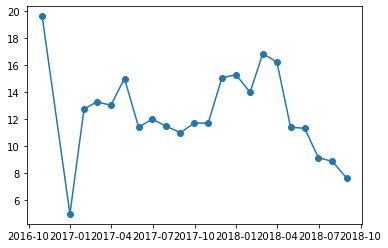

In [186]:
plt.plot_date(delivery_by_month['month_date'],delivery_by_month['Delivery time'], linestyle = 'solid' )


Delivery time fluctuates but in a general downward trend

In [187]:
# process order payment file
#check if number of payment sequential equal the number of occurrence of order ID 
#>> if not equal meaning that either insufficent revenue received or missing data
# df = payment.groupby('order_id').count()
# df.groupby('payment_sequential').count()
# df = df[df['payment_sequential'] != df['count']]
# df.head()
#empty df >> correct number of sequential payment


In [188]:
# create another dataframe from payment type with sum of payment value
payment_2 = payment.groupby('order_id')['payment_value'].sum().reset_index(name ='cash_received')
payment_2.head()





,order_id,cash_received
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [189]:
#order_items
##price of each item + shipping fee
## we have to calculate the total revenue of each order ID by group the df by order ID
order_item['total_price'] = order_item['price'] + order_item['freight_value']
order_item_2 = order_item.groupby(['order_id'])['total_price'].sum().reset_index(name ='total_price_per_order')
order_item_2.head()
#merge payment with order_items

,order_id,total_price_per_order
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [190]:
#merde order item 2 with payment 2
New_1 = pd.merge(payment_2, order_item_2, how='outer', on = 'order_id')
New_1.head()
#check if money receive equal amount in order item
New_1['discrepacy']= New_1['cash_received'] - New_1['total_price_per_order']
New_2 = pd.merge(New_1,order, how = 'outer', on = 'order_id' )
New_3 = pd.merge(New_2, customer_dataset, how = 'left', on = 'customer_id' )
New_4 = pd.merge(New_3, customer_review, how = 'left', on = 'order_id')
New_4 = New_4.drop_duplicates(subset=['order_id'])
New_4.head()

,order_id,cash_received,total_price_per_order,discrepacy,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,72.19,0.000000e+00,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13,2017-09-19,2017-09-20,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,259.83,259.83,0.000000e+00,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,2017-04-26,2017-05-04,2017-05-12,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,216.87,216.87,0.000000e+00,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,2018-01-14,2018-01-16,2018-01-22,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,25.78,25.78,0.000000e+00,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08,2018-08-08,2018-08-10,2018-08-14,...,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,218.04,-2.842171e-14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04,2017-02-04,2017-02-16,2017-03-01,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [191]:
#check for missing value
missing = pd.concat([New_4.isna().sum().sort_values(ascending = False), (New_4.isna().sum()/New_4.isna().count()*100).sort_values(ascending = False)], axis = 1, keys = ['count', 'percent']) 
missing

,count,percent
review_comment_title,87744,88.237246
review_comment_message,57886,58.211402
Delivery time,2965,2.981668
order_delivered_customer_date,2965,2.981668
order_delivered_carrier_date,1783,1.793023
discrepacy,776,0.780362
total_price_per_order,775,0.779357
order_approved_at,160,0.160899
cash_received,1,0.001006
customer_city,0,0.000000


<AxesSubplot:title={'center':'Sale by state'}, xlabel='customer_state', ylabel='Avg_Sale_by_state'>

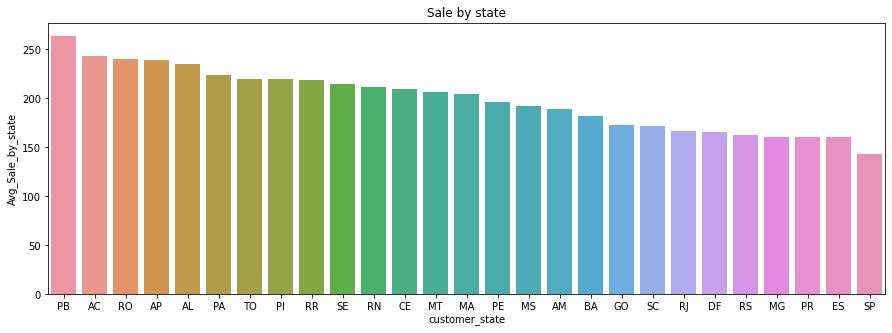

In [192]:
#Average order by state

Sale_by_state = (New_4.groupby(['customer_state'])['cash_received'].sum()/New_4.groupby('customer_state')['order_id'].count()).reset_index(name ='Avg_Sale_by_state').sort_values(ascending=False, by = 'Avg_Sale_by_state')
plt.figure(figsize=(15,5))
plt.title('Sale by state')
sns.barplot(x=Sale_by_state.customer_state, y=Sale_by_state.Avg_Sale_by_state)


### Check the correlation of overcharge and payment method

232 3064.7599999999998


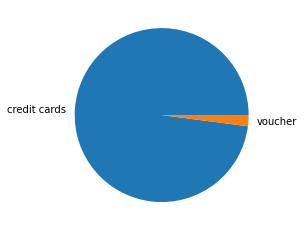

In [193]:
#Check if cash receive equal total price
#receive more than actual order
df2 = New_4[New_4['discrepacy']>1]
# df4 = pd.concat([df2['discrepacy'].sum(), len(df2['discrepacy'])], axis = 1, keys = ['amount', 'number of txn'])
print(len(df2['discrepacy']), df2['discrepacy'].sum())
# print(df2['discrepacy'].sum())
#check to see the payment method
df3 = pd.merge(df2, payment, how='inner', on = 'order_id')
df3['payment_type'].value_counts()
df3['payment_installments'].value_counts()
plt.pie(df3['payment_type'].value_counts(), labels = ['credit cards', 'voucher'])


plt.show()



**Majority of exceeded revenue is from credit card payment >> to check control system over credit payment**

In [194]:
# print(len(New_2['order_id']))
# New_3 = pd.merge(New_2, customer_review, how = 'left', on = 'order_id')
# New_3 = New_3.drop_duplicates(subset=['order_id'])
# print(len(New_3['order_id']))
# New_3
# New_3.to_csv(r'R:\NganLKT\brazilian-ecommerce\mergereview.csv')

### Check for possible correlation between delivery time and review score

In [195]:
New_4.corr()

,cash_received,total_price_per_order,discrepacy,Delivery time,customer_zip_code_prefix,review_score
cash_received,1.000000,0.999987,0.017663,0.069893,0.057813,-0.050083
total_price_per_order,0.999987,1.000000,0.012543,0.069854,0.058072,-0.047508
discrepacy,0.017663,0.012543,1.000000,0.006429,0.011464,-0.004488
Delivery time,0.069893,0.069854,0.006429,1.000000,0.271432,-0.335080
customer_zip_code_prefix,0.057813,0.058072,0.011464,0.271432,1.000000,-0.015372
review_score,-0.050083,-0.047508,-0.004488,-0.335080,-0.015372,1.000000


In [197]:
#Average score >> can be improved
New_4['review_score'].mean()
    

4.0712784465160246

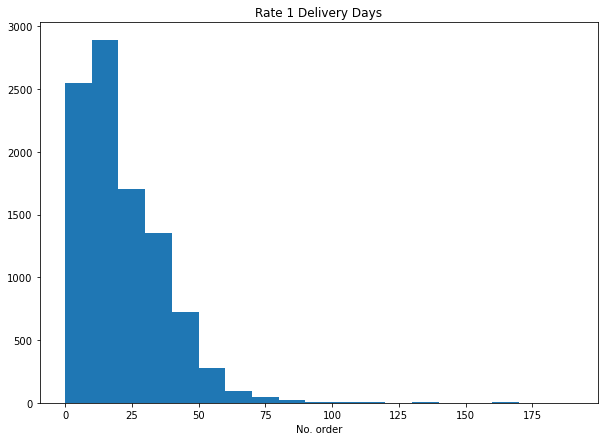

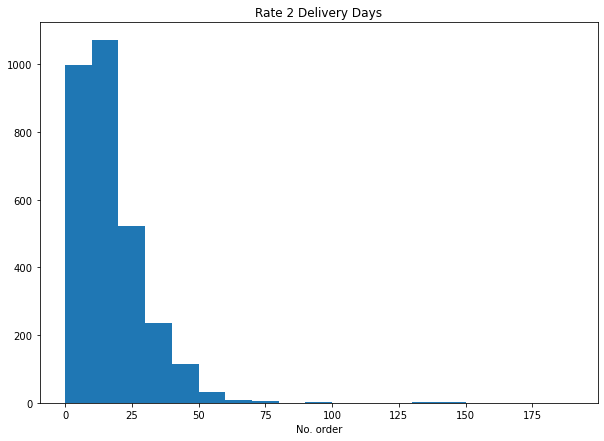

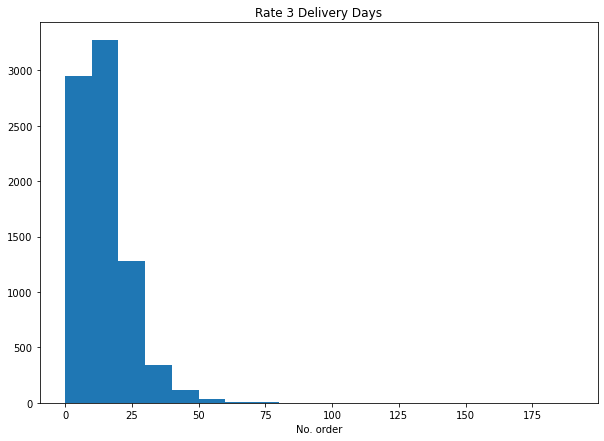

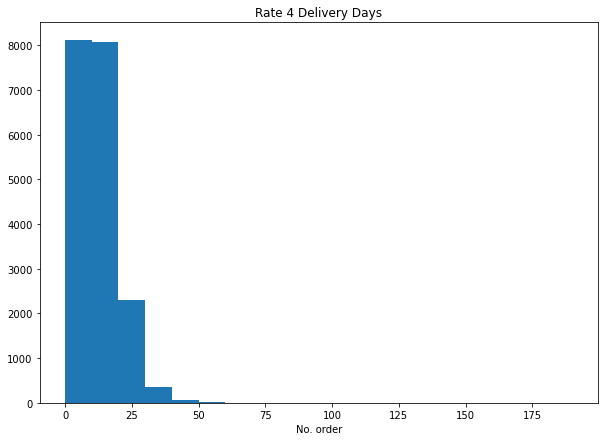

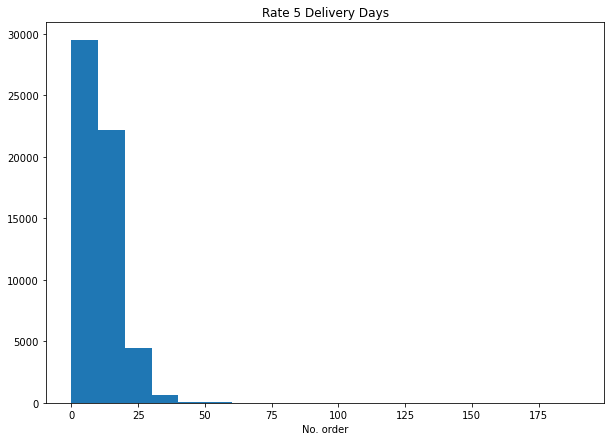

In [212]:
# fig, ax = plt.subplots(nrows=1, ncols=5)
# print(ax.shape)

for i in range(1, 6):
    Rate_1 = New_4[New_4['review_score']== i]
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(Rate_1['Delivery time'], bins = range(0, 200, 10))
    plt.title('Rate '+ str(i) + ' Delivery Days')
    plt.xlabel('Delivery days')
    plt.xlabel('No. order')


We see a clear relation between review score and delivery time as the chart of the higher rate have higher number of shorter delivery date